<a href="https://colab.research.google.com/github/TutuBraz/-TutuBraz-performance-analysis-brazil-voleyball-coach/blob/main/web_scraping_and_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Web scraping

##  tabela ranking

In [110]:
urls_ranking = ['https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=4948122',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=8501945',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=13445522',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=17982840',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=22672516',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=27886312',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=32301573',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=37157803',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=40566355',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=43967832',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=46588066',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=49867498',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=53907362',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=56490298',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=58983216',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=62088198',
              'https://pt.wikipedia.org/w/index.php?title=Ranking_da_Federa%C3%A7%C3%A3o_Internacional_de_Voleibol&oldid=64583565'
              ]

In [111]:
#iniciando um df vazio
df_ranking = pd.DataFrame()

#pegando cada linha desejada em diferentes anos
for i in urls_ranking:
  html = pd.read_html(i, match='Ranking masculino')
  termo = html[0].loc[html[0][1]=='Brasil'].iloc[[0]]
  df_ranking = pd.concat([df_ranking, termo])

#renomeando as colunas
df_ranking.rename(columns={0: 'position',
                           2: 'score',
                           3: 'year'}, inplace = True)

#retirando coluna pais
df_ranking.drop([1], axis=1, inplace=True)

#adicionando valores na coluna year
year = [x for x in range(2006, 2023, 1)]
df_ranking.year = year

#alterando o score de 2010
df_ranking.iat[4,1]=str(247.5)

#resetando o index
df_ranking.reset_index(drop =True, inplace=True)

df_ranking

,position,score,year
0,1,195,2006
1,1,260,2007
2,1,313,2008
3,1,250,2009
4,1,247.5,2010
5,1,300,2011
6,1,300,2012
7,1,345,2013
8,1,335,2014
9,1,330,2015


In [112]:
df_ranking.score = pd.to_numeric(df_ranking.score)

In [113]:
df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   position  17 non-null     object 
 1   score     17 non-null     float64
 2   year      17 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 536.0+ bytes


## tabela competicao

In [114]:
#link tabelas
url = 'https://pt.wikipedia.org/wiki/Sele%C3%A7%C3%A3o_Brasileira_de_Voleibol_Masculino'

#objeto tabelas
html = pd.read_html(url)

#dict para busca e renomecao das tabelas
campeonatos = {'jogos_olimpicos':17,
               'campeonato_mundial':18,
               'copa_do_mundo':19,
               'copa_campeoes':20,
               'liga_nacoes':21,
               'liga_mundial':22,
               'sul_americano':23}


#iniciando df vazio
df_campeonatos = pd.DataFrame()

#adicionando a classificacao de campeonatos um uma tabela
for camp, index in campeonatos.items():
  tabela = html[index]
  tabela.Sede = camp
  df_campeonatos = pd.concat([df_campeonatos,tabela])

#Renomenado coluna
df_campeonatos.rename(columns={'Sede': 'Campeonato'}, inplace=True)


#Reordenando pelo ano
df_campeonatos.sort_values(by=['Ano'], inplace=True)


df_campeonatos = df_campeonatos.loc[df_campeonatos.Ano >=2002]
#resetando index
df_campeonatos.reset_index(drop=True, inplace=True)
df_campeonatos.head()

,Ano,Campeonato,Classificação
0,2002,campeonato_mundial,1º
1,2002,liga_mundial,2º
2,2003,copa_do_mundo,1º
3,2003,liga_mundial,1º
4,2003,sul_americano,1º


In [115]:
#Criando dummies  para plotar resultados das medalhas
df_campeonatos = pd.get_dummies(df_campeonatos, columns=['Classificação']) 
df_campeonatos.head()

,Ano,Campeonato,Classificação_1º,Classificação_2º,Classificação_3°,Classificação_3º,Classificação_4º,Classificação_5º,Classificação_6º
0,2002,campeonato_mundial,1,0,0,0,0,0,0
1,2002,liga_mundial,0,1,0,0,0,0,0
2,2003,copa_do_mundo,1,0,0,0,0,0,0
3,2003,liga_mundial,1,0,0,0,0,0,0
4,2003,sul_americano,1,0,0,0,0,0,0


In [116]:
#Retirando a colunas indesejadas 
df_resultados = df_campeonatos.drop(["Campeonato","Classificação_4º","Classificação_5º", "Classificação_6º"], axis=1)
df_resultados.head()

,Ano,Classificação_1º,Classificação_2º,Classificação_3°,Classificação_3º
0,2002,1,0,0,0
1,2002,0,1,0,0
2,2003,1,0,0,0
3,2003,1,0,0,0
4,2003,1,0,0,0


In [117]:
#Agrupando e somando os resultados por ano
df_resultados = df_resultados.groupby(['Ano']).sum()

#somando o resultado das colunas Classificação_3°	e Classificação_3º
df_resultados['Classificação_3º'] = df_resultados['Classificação_3º']+df_resultados['Classificação_3°']

#Excluindo coluna Classificação_3°
df_resultados.drop(["Classificação_3°"], axis=1, inplace=True)

#renomenado colunas
df_resultados.rename(columns={'Classificação_1º': 'ouro',
                              'Classificação_2º':'prata',
                              'Classificação_3º': 'bronze'}, inplace=True)
df_resultados.head()

,ouro,prata,bronze
Ano,,,
2002,1,1,0
2003,3,0,0
2004,2,0,0
2005,3,0,0
2006,2,0,0


## tabela media_idades

In [118]:
olip_media_idade = [26.9, 28.3, 28.7, 29.3, 28.8, 30.3,28.1,30.4,30.2, 30.9,28.9]
df_olip_media_idade = {'ano': [2002,2004,2006,2008,2010,2012,2014,2016,2018,2021,2022],
                       'media_idade':olip_media_idade}
df_olip_media_idade = pd.DataFrame(df_olip_media_idade)  
df_olip_media_idade                     

,ano,media_idade
0,2002,26.9
1,2004,28.3
2,2006,28.7
3,2008,29.3
4,2010,28.8
5,2012,30.3
6,2014,28.1
7,2016,30.4
8,2018,30.2
9,2021,30.9


# Análise


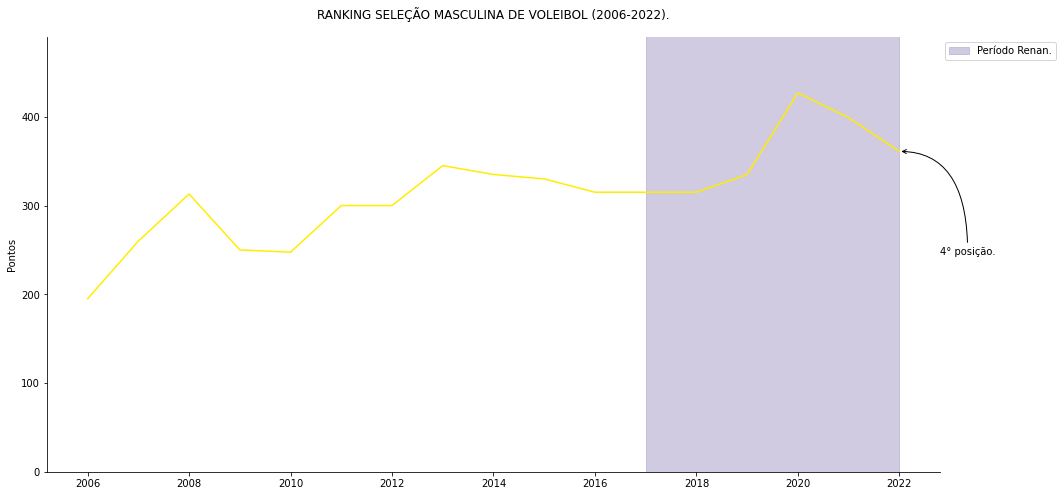

In [119]:

#iniciando a figura
fig, ax = plt.subplots(figsize=(16,8))

plt.ylim([0,490])
#plotando o gráfico
ax.plot(df_ranking.year, df_ranking.score, color='#ffed00')

#Desenhado o perído renan
ax.axvspan(xmin=2017, xmax=2022, ymin=0, ymax=2, color='#a499c4', alpha=0.5, label='Período Renan.')

#tirando as colunas
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

#Desenhando a seta
ax.annotate('4° posição.', xy=(2022, 361),  xycoords='data',
            xytext=(1, 0.5), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3")
            )
#rotulo eixo y
ax.set_ylabel('Pontos')

#titulo
ax.set_title('RANKING SELEÇÃO MASCULINA DE VOLEIBOL (2006-2022).', pad=18)

#legenda
ax.legend(bbox_to_anchor = (1.0, 1)) 
fig.show()

O Renan assumiu a seleção brasileira em 2017 e consegui se manter em primeiro lugar no ranking até 2021. Apesar do crescimento constante da pontução da seleção sob o comando do novo técnico, houve apenas um crescimento significativo na pontuação entre os anos de 2019 e 2020, possivelmente devido a mudança do modo como se é calculado o ranking da Federação internacional de voleibol, que pontua para todos os jogos em campeonatos com no mínimo quatro seleções participantes e o resultado das competições no ano de 2019. No ano de 2022 a seleção caiu para o 4° luga r do ranking, posição inédita para o período analisado. Desde a entrada do técnico na seleção te um crescimeto de 46 ponto para o perído analisado. 



*   Obs: Infelizmente a Federação Internacional de Voleibol (FIVB) não tem disponível o documento explicando a antiga métrica de pontuação do ranking.


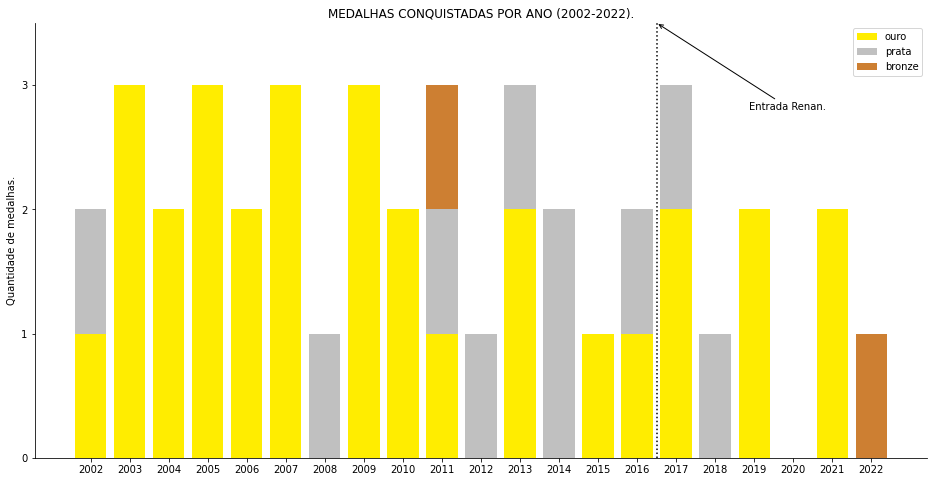

In [120]:
# Cria figura 
figure, left_ax = plt.subplots(figsize=(16,8))
plt.ylim([0,3.5])

#Criando gráfico
left_ax.bar(df_resultados.index, df_resultados['ouro'], color= '#ffed00' , label='ouro')
left_ax.bar(df_resultados.index, df_resultados['prata'],bottom= df_resultados['ouro'], color='#c0c0c0', label='prata')
left_ax.bar(df_resultados.index, df_resultados['bronze'],bottom = df_resultados['ouro']+ df_resultados['prata'], color='#cd7f32', label='bronze')

#Nomei eixo
left_ax.set_ylabel('Quantidade de medalhas.')

#tirando as colunas
for spine in ['top', 'right']:
    left_ax.spines[spine].set_visible(False)

#Alterando rótulos.
left_ax.yaxis.set_ticks(np.arange(0, 3.5, 1)) 
left_ax.xaxis.set_ticks(np.arange(2002, 2023, 1))

#Linha vertical
left_ax.axvline(x = 2016.5,linestyle='dotted', color = '#000000') 

#Desenhando a seta
left_ax.annotate('Entrada Renan.', xy=(2016.5, 3.5),
            xytext=(0.8, 0.8), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

#titulo
left_ax.set_title('MEDALHAS CONQUISTADAS POR ANO (2002-2022).')

#legenda
left_ax.legend(loc='best')
fig.show()

As competições analisadas no período foram: Liga Mundial, Liga das Nações(antiga Liga Mundial), Jogos Olímpicos, Campeonato Mundial, Campeonato Sul Americano, Copa do Mundo e Copa dos Campeões. Sendo que o maior número de medalhas que uma seleção pode ganhar em um ano são 3.

Depois da entrada do técnico Renan, a seleção conseguiu bons resultados apesar não possuir uma performance igual ou superior se analizada todos os 6 anos de trabalho. A seleção na gestão Renan possui ao todo 6 medalhas de ouro, 2 de prata e 1 de bronze, totalizando um médias de 1.5 medalhas por ano, muito provavelmente a quantidade de medalhas poderiam ser diferentes se não fosse pelos campeonatos cancelados no ano de 202o devido a COVID-19.

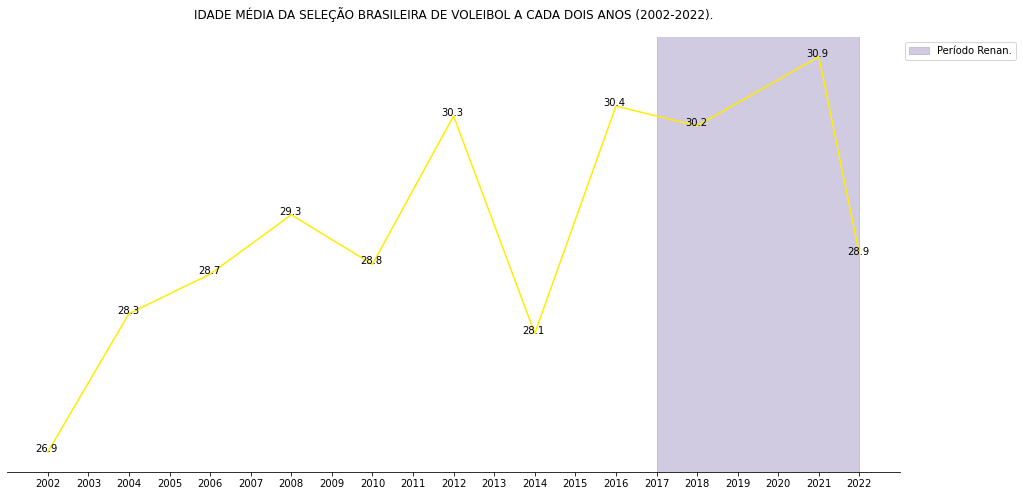

In [121]:
#iniciando a figura
fig, ax = plt.subplots(figsize=(16,8))


#plotando o gráfico
ax.plot(df_olip_media_idade.ano, df_olip_media_idade.media_idade, color='#ffed00')

#Desenhado o perído renan
ax.axvspan(xmin=2017, xmax=2022, ymin=0, ymax=2, color='#a499c4', alpha=0.5, label='Período Renan.')

#reorganizando o eixo y
ax.xaxis.set_ticks(np.arange(2002, 2023, 1))

#tirando as colunas
for spine in ['top', 'right','left']:
    ax.spines[spine].set_visible(False)

#removendo os valores do eixo y
plt.yticks([]) 

#Colocando rótulos em um gráfico de linhas
for i in range(0,11):
  ax.annotate(df_olip_media_idade.media_idade[i],(df_olip_media_idade.ano[i]-0.3,df_olip_media_idade.media_idade[i]))
#titulo
ax.set_title('IDADE MÉDIA DA SELEÇÃO BRASILEIRA DE VOLEIBOL A CADA DOIS ANOS (2002-2022).', pad=18)

#legenda
ax.legend(bbox_to_anchor = (1.0, 1), loc = 'best') 
fig.show()

A idade média da seleção é um indicador de renovação dos atletas do elenco dos campeonatos.

Para o período analisado foi utilizada as idades médias das principais competições, Jogos Olímpico e Campeonato Mundial. Observa-se que na gestão Renan, a seleção possui a a maior idade média dos último 20 anos, o que pode ser explicada por dois fatores. A primeira é por causa do avanço na medicina que proporciona aos atletas uma carreira mais longeva, e a segunda seria a falta de investimento na base do voleibol brasileiro. Infelizmente não consegui encontrar dados históricos de invesmento no voleibol anteriores ao ano de 2017.

CONCLUSÃO.

Por mais que a gestão Renan seja criticada pelos seus resultados e algumas polemicas, não é possível afirmar que ele não faça um trabalho vitorioso, apesar de amargar na quarta posição do Ranking em 2022 o seu trabalho até agora tem conquistado titúlos, e mantido uma constancia se comparada com a gestão anterior, vale ressaltar que o Renan não aposta em jovens talentos para as maiores competições do esporte.